In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%ls

 Volume in drive D is D
 Volume Serial Number is 02D3-2159

 Directory of D:\Notas de Estudio\Proyectos\production_analysis__project\production_analysis\notebooks

01/15/2022  03:17 PM    <DIR>          .
01/15/2022  03:17 PM    <DIR>          ..
01/15/2022  03:17 PM    <DIR>          .ipynb_checkpoints
01/10/2022  08:22 PM           131,054 0_preparing_data.ipynb
01/15/2022  03:16 PM                72 05_scrap_per_machine.ipynb
01/10/2022  08:38 PM            38,763 1_machine_working_days.ipynb
01/14/2022  08:22 PM           534,053 2_scrap_vs_production.ipynb
01/10/2022  08:56 PM           349,197 3_scrap_vs_total_scrap.ipynb
01/10/2022  08:57 PM            23,153 4_cross_information_between_lists.ipynb
               6 File(s)      1,076,292 bytes
               3 Dir(s)  223,191,379,968 bytes free


In [10]:
%cd D:\Notas de Estudio\Proyectos\production_analysis__project\production_analysis\data\processed

D:\Notas de Estudio\Proyectos\production_analysis__project\production_analysis\data\processed


In [11]:
%ls

 Volume in drive D is D
 Volume Serial Number is 02D3-2159

 Directory of D:\Notas de Estudio\Proyectos\production_analysis__project\production_analysis\data\processed

01/15/2022  03:15 PM    <DIR>          .
01/15/2022  03:15 PM    <DIR>          ..
12/25/2021  01:16 PM                 0 .gitkeep
01/01/2022  12:05 PM    <DIR>          .ipynb_checkpoints
01/15/2022  03:15 PM                56 common list.txt
01/15/2022  03:14 PM           271,738 data.csv
01/15/2022  03:14 PM               655 machines_days_of_work.csv
01/15/2022  03:14 PM            17,854 scrap_vs_production.pdf
01/15/2022  03:15 PM            16,791 scrap_vs_total_scrap.pdf
01/15/2022  03:15 PM            29,677 tendency_scrap_vs_production.pdf
01/15/2022  03:15 PM            29,759 tendency_scrap_vs_total_scrap.pdf
               8 File(s)        366,530 bytes
               3 Dir(s)  223,191,375,872 bytes free


In [45]:
data = pd.read_csv("data.csv")
data.head(5)

,FECHA,TURNO,GRUPO,MÁQ.,CODIGO,PRODUCCION (PZAS),TOTAL KG,SCRAP,DIA,NOMBRE_DIA
0,2021-12-01,Mañana,B,EB G1,0,0,0.000,0.00,1,Wednesday
1,2021-12-01,Mañana,B,EB G2,"IBT24,5X35C0F0S",4,64.550,86.25,1,Wednesday
2,2021-12-01,Mañana,B,EB G3,IBT17X40G1F0SO,8,194.770,12.40,1,Wednesday
3,2021-12-01,Mañana,B,EB G4,IBT17X30G1F0S2,8,295.776,11.85,1,Wednesday
4,2021-12-01,Mañana,B,EB-17,0,0,0.000,0.00,1,Wednesday


In [46]:
data.drop(['FECHA', 'TURNO', 'GRUPO', 'CODIGO', 'PRODUCCION (PZAS)', 'DIA', 'NOMBRE_DIA'], inplace = True, axis = 1)
data.head(5)

,MÁQ.,TOTAL KG,SCRAP
0,EB G1,0.000,0.00
1,EB G2,64.550,86.25
2,EB G3,194.770,12.40
3,EB G4,295.776,11.85
4,EB-17,0.000,0.00


In [47]:
data = data.groupby('MÁQ.').sum()
data.head(5)

,TOTAL KG,SCRAP
MÁQ.,,
EB 120,23432.213,1331.60
EB 121,54850.490,6826.78
EB G1,9404.216,769.75
EB G2,9999.206,1896.40
EB G3,5954.846,950.83


In [48]:
len(data.index.values)

62

In [49]:
data['PORCENTAJE'] = data['SCRAP']/(data['SCRAP']+data['TOTAL KG'])*100
data.head(5)

,TOTAL KG,SCRAP,PORCENTAJE
MÁQ.,,,
EB 120,23432.213,1331.60,5.377201
EB 121,54850.490,6826.78,11.068551
EB G1,9404.216,769.75,7.565879
EB G2,9999.206,1896.40,15.942021
EB G3,5954.846,950.83,13.768819


In [50]:
data.sort_values(by = 'PORCENTAJE', ascending = True) # just to check if there is a strange value


,TOTAL KG,SCRAP,PORCENTAJE
MÁQ.,,,
EB-098,11.769,0.00,0.000000
EB-091,3482.325,45.85,1.299539
EB-105,3881.690,57.60,1.462192
EB-119,17318.811,465.10,2.615285
EB-051,5386.174,172.30,3.099772
...,...,...,...
EB-095,0.000,0.00,NaN
EB-096,0.000,0.00,NaN
EB-097,0.000,0.00,NaN


In [57]:
#removing machines with scrap = 0

data = data.loc[data['SCRAP']>0]
data.sort_values(by = 'PORCENTAJE', ascending = True, inplace = True)
data

,TOTAL KG,SCRAP,PORCENTAJE
MÁQ.,,,
EB-091,3482.325,45.85,1.299539
EB-105,3881.690,57.60,1.462192
EB-119,17318.811,465.10,2.615285
EB-051,5386.174,172.30,3.099772
EB-093,1891.364,61.55,3.151700
EB-036,5546.118,185.35,3.233901
EB-050,5555.614,199.30,3.463127
EB-044,4741.134,177.70,3.612645
EB G4,1597.046,60.20,3.632533


In [58]:
len(data.index.values)

46

In [59]:
machines = data.index.values
machines

array(['EB-091', 'EB-105', 'EB-119', 'EB-051', 'EB-093', 'EB-036',
       'EB-050', 'EB-044', 'EB G4', 'EB-053', 'EB-090', 'EB-118',
       'EB-117', 'EB-114', 'EB 120', 'EB-125', 'EB-124', 'EB-043',
       'EB-102', 'EB-103', 'EB-109', 'EB-032', 'EB-111', 'EB-052',
       'EB-074', 'EB-110', 'EB-107', 'EB-104', 'EB G1', 'EB-122',
       'EB-046', 'EB-045', 'EB-123', 'EB-075', 'EB-099', 'EB-029',
       'EB-17', 'EB 121', 'EB-18', 'EB-115', 'EB G3', 'EB-101', 'EB-070',
       'EB-108', 'EB G2', 'EB-106'], dtype=object)

In [69]:
#number of charts
n = 1
mac = len(machines)
while mac>15:
    mac = mac -15
    n=n+1
print(n)
    

4


In [70]:
machines[0:15]

array(['EB-091', 'EB-105', 'EB-119', 'EB-051', 'EB-093', 'EB-036',
       'EB-050', 'EB-044', 'EB G4', 'EB-053', 'EB-090', 'EB-118',
       'EB-117', 'EB-114', 'EB 120'], dtype=object)

In [71]:
data["PORCENTAJE"].iloc[0:15]

MÁQ.
EB-091    1.299539
EB-105    1.462192
EB-119    2.615285
EB-051    3.099772
EB-093    3.151700
EB-036    3.233901
EB-050    3.463127
EB-044    3.612645
EB G4     3.632533
EB-053    3.865722
EB-090    4.705195
EB-118    5.135660
EB-117    5.204313
EB-114    5.321383
EB 120    5.377201
Name: PORCENTAJE, dtype: float64

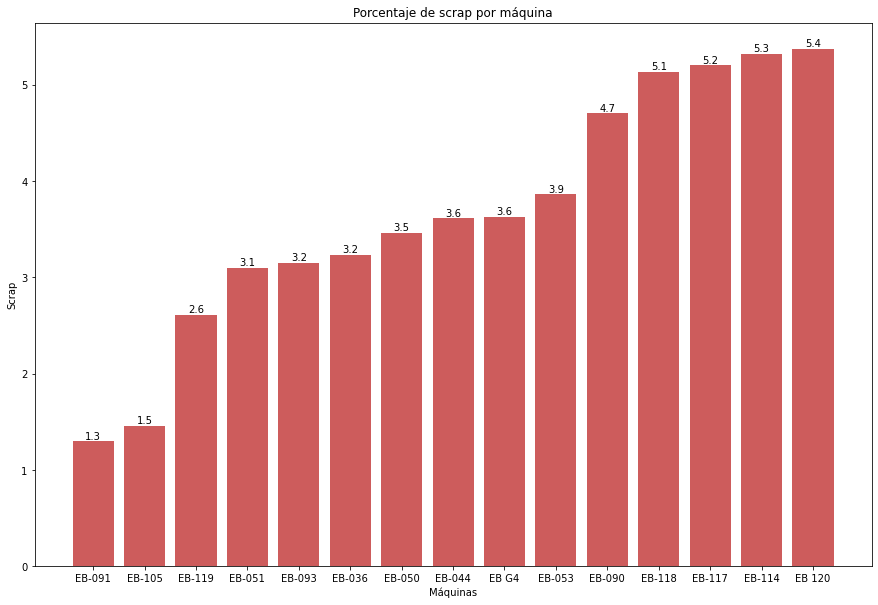

In [72]:
#Example of one chart
fig, axs = plt.subplots(figsize = [15,10] )
x = machines[0:15]
y = data["PORCENTAJE"].iloc[0:15]
bars = axs.bar(x, y, color = 'indianred', alpha = 1 ,linewidth = 0.2)
axs.set_xlabel('Máquinas')
axs.set_ylabel('Scrap')
axs.set_title('Porcentaje de scrap por máquina')
axs.bar_label(bars, label_type = "edge", fmt='%0.1f')
plt.show()

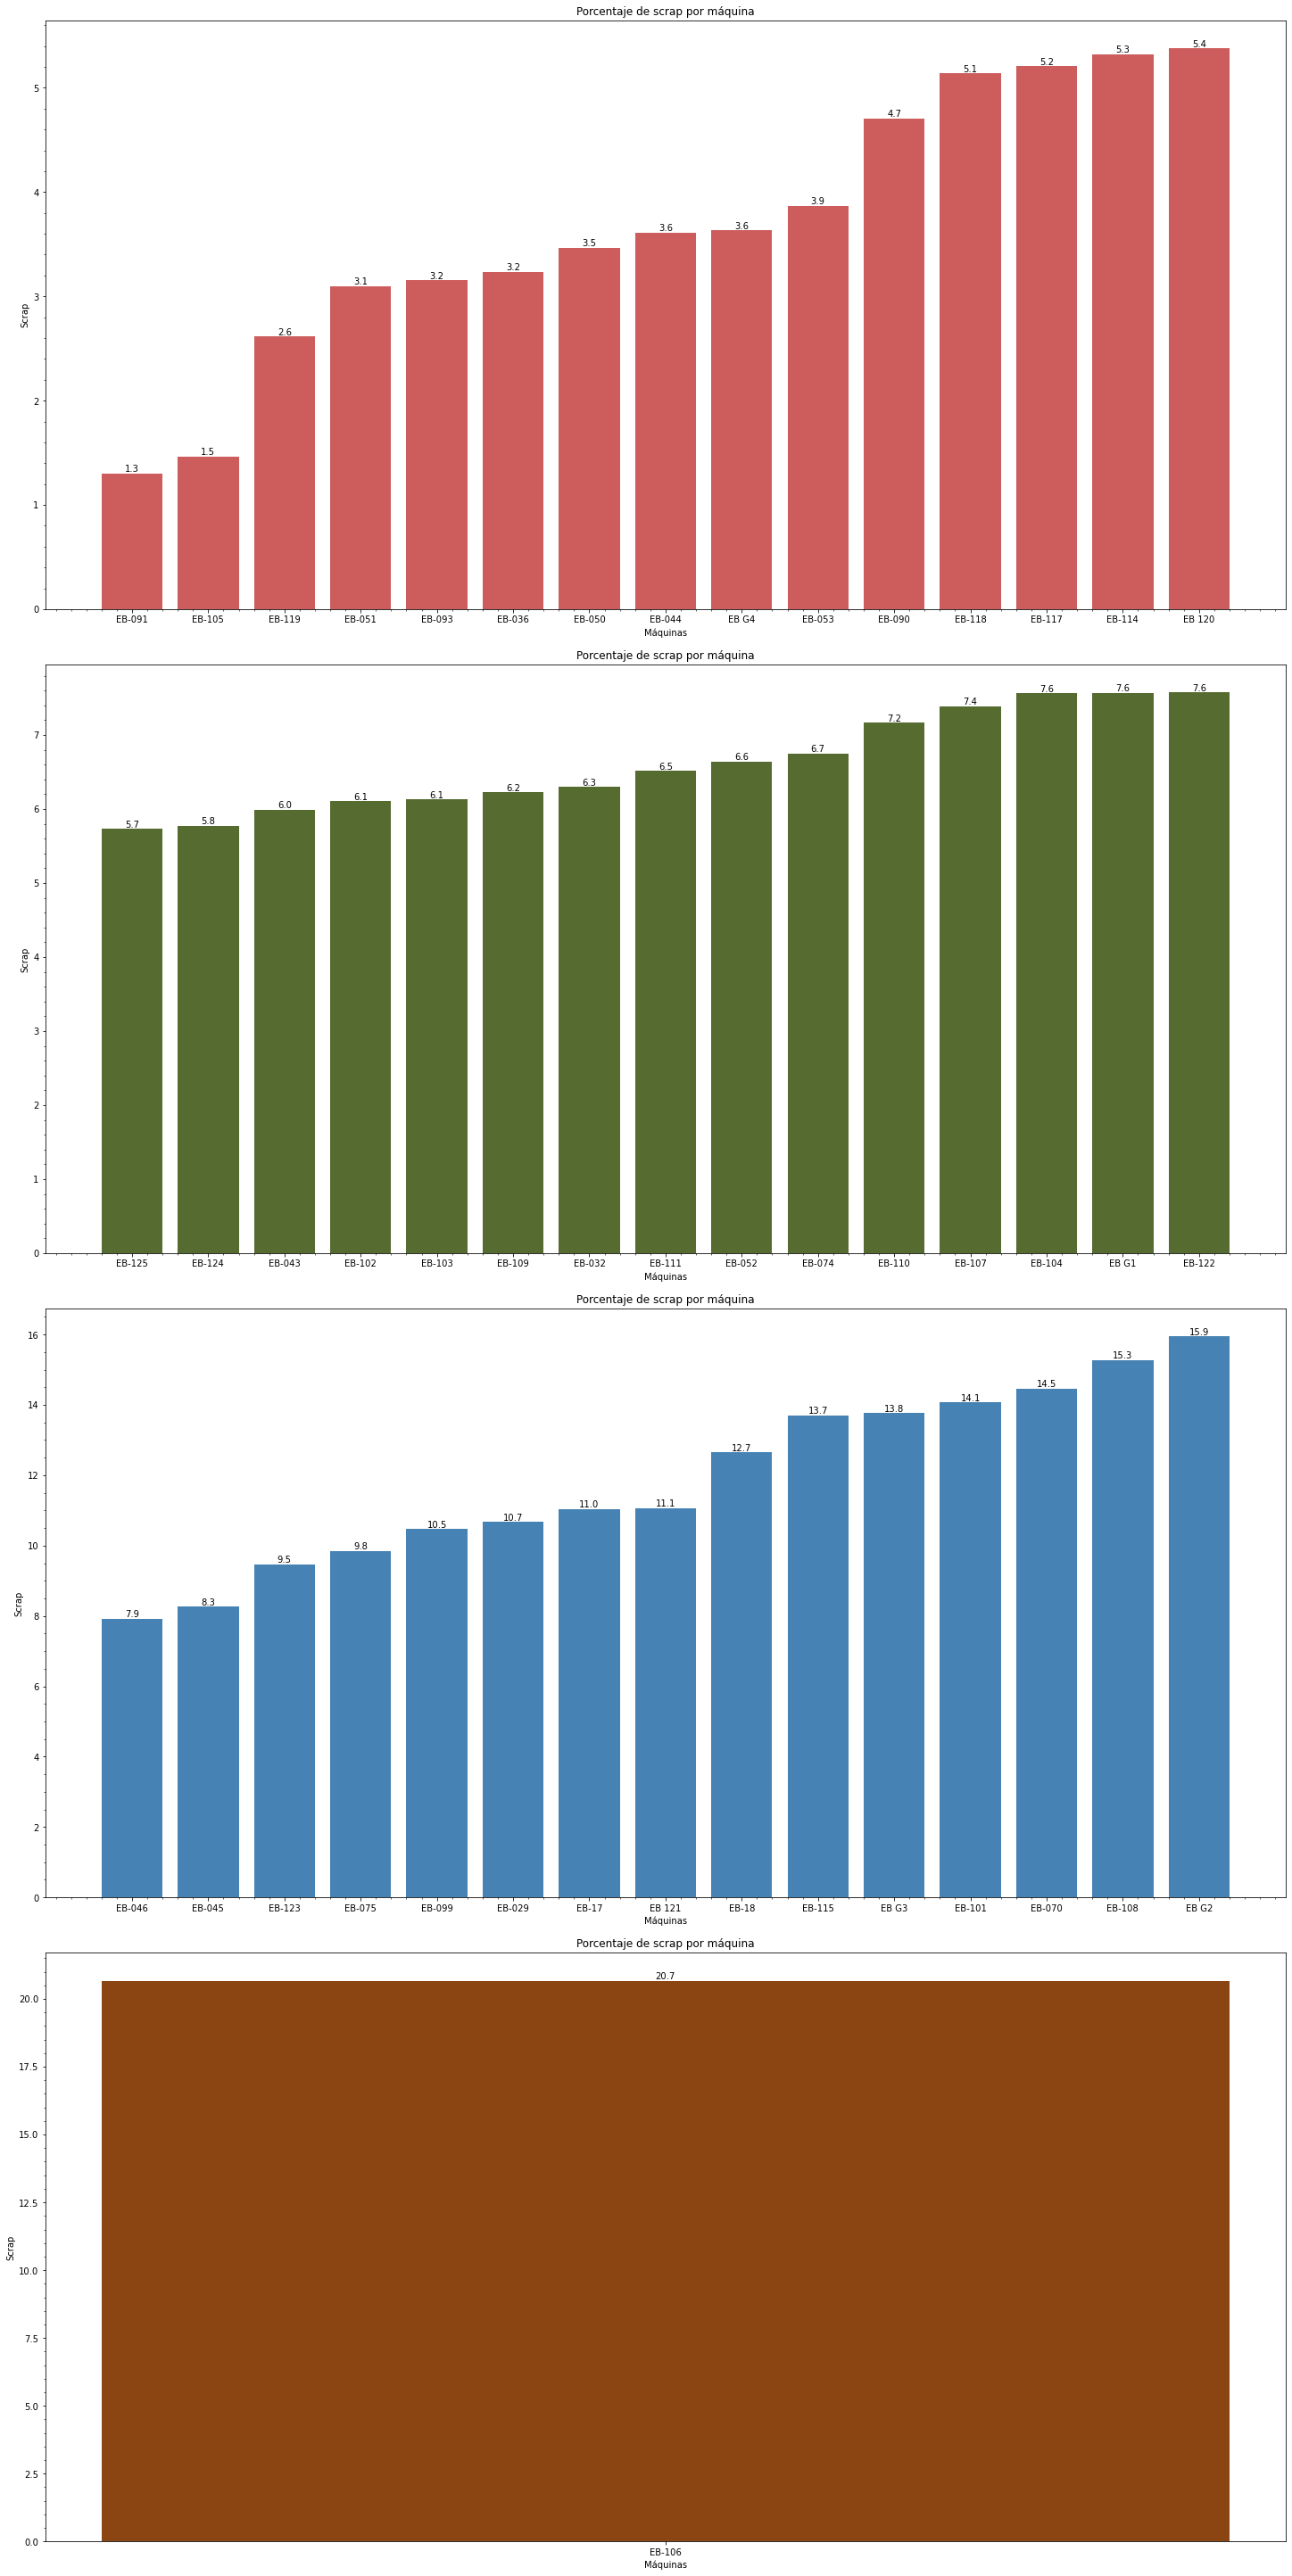

In [123]:
color = ['indianred', 'darkolivegreen','steelblue', 'saddlebrown']
fig = plt.subplots(figsize = [20,40],constrained_layout=True)

initial_value = 0 
last_value = 15
for i in range(n):
    plt.subplot(4,1,i+1)
    x = machines[initial_value:last_value]
    y = data["PORCENTAJE"].iloc[initial_value:last_value]
    bars = plt.bar(x, y, color = color[i], alpha = 1, linewidth = 0.2)
    plt.xlabel('Máquinas')
    plt.ylabel('Scrap')
    plt.title('Porcentaje de scrap por máquina')
    plt.bar_label(bars, label_type = "edge", fmt='%0.1f')
    plt.minorticks_on()
 
    
 
    initial_value = initial_value + 15
    last_value = last_value +15

        
#plt.show()
plt.savefig('scrap per machine')
    